In [6]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
from kmodes.kmodes import KModes

In [8]:
df = pd.read_excel('..\datasets\FoodInsecurity_Hispanic_Demographics_Tone_Preferences_Dataset.xlsx')

In [9]:
df.head(2)

,age,gender,ethnicity,race,education,marital_status,income,employment,language,disability,states,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8
0,45-54,female,non hispanic,native american,High School,na,"$25,000 - $49,999",Employed Part time,both,i do not have a disability,indiana,Persuasive,Simplier,Empathetic,Persuasive,Original,Original,Persuasive,Original
1,18-24,male,hispanic,white,High School,single,"Less than $25,000",Employed Part time,english,i do not have a disability,illinois,Original,Simplier,Empathetic,Simplier,Simplier,Original,Original,Persuasive


In [10]:
data = df[['age','marital_status', 'employment']]

In [36]:
# Import necessary libraries
import pandas as pd
from kmodes.kmodes import KModes

# Load your demographic data
# Consider using only relevant categorical columns
categorical_data = data[['age', 'marital_status', 'employment']]  # Adjust as needed

# Set the number of clusters
num_clusters = 10  # Choose a suitable number based on your analysis

# Perform K-Modes clustering
kmodes = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=1)
clusters = kmodes.fit_predict(categorical_data)

# Add cluster labels to the original data
data['Cluster'] = clusters

# View the clustered data
print(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 32, cost: 288.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 48, cost: 232.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 224.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 56, cost: 248.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 16, cost: 272.0
Best run was number 3
     Cluster    age                  disability    education  \
0          7  45-54  i do not have a disability  High School   
1          4  18-24  i do not have a disability  High School   
2          1  25-34  i do not have a disability    Associate   
3          1  25-34  i do not have a disability    Associate   
4          1  18-24

data.head(2)

In [38]:
data.to_excel('data_clustered.xlsx', index=False)

In [39]:
data = pd.read_excel('kmodes-clustered.xlsx')

In [40]:
# List of columns to plot
columns_to_plot = ['age', 'disability', 'education', 'employment', 'ethnicity', 'gender', 'income', 'language', 'marital_status', 'race', 'tone']

In [41]:
import matplotlib.pyplot as plt


In [42]:
data.columns

Index(['Cluster', 'age', 'disability', 'education', 'employment', 'ethnicity',
       'gender', 'income', 'language', 'marital_status', 'race', 'states',
       'tone'],
      dtype='object')

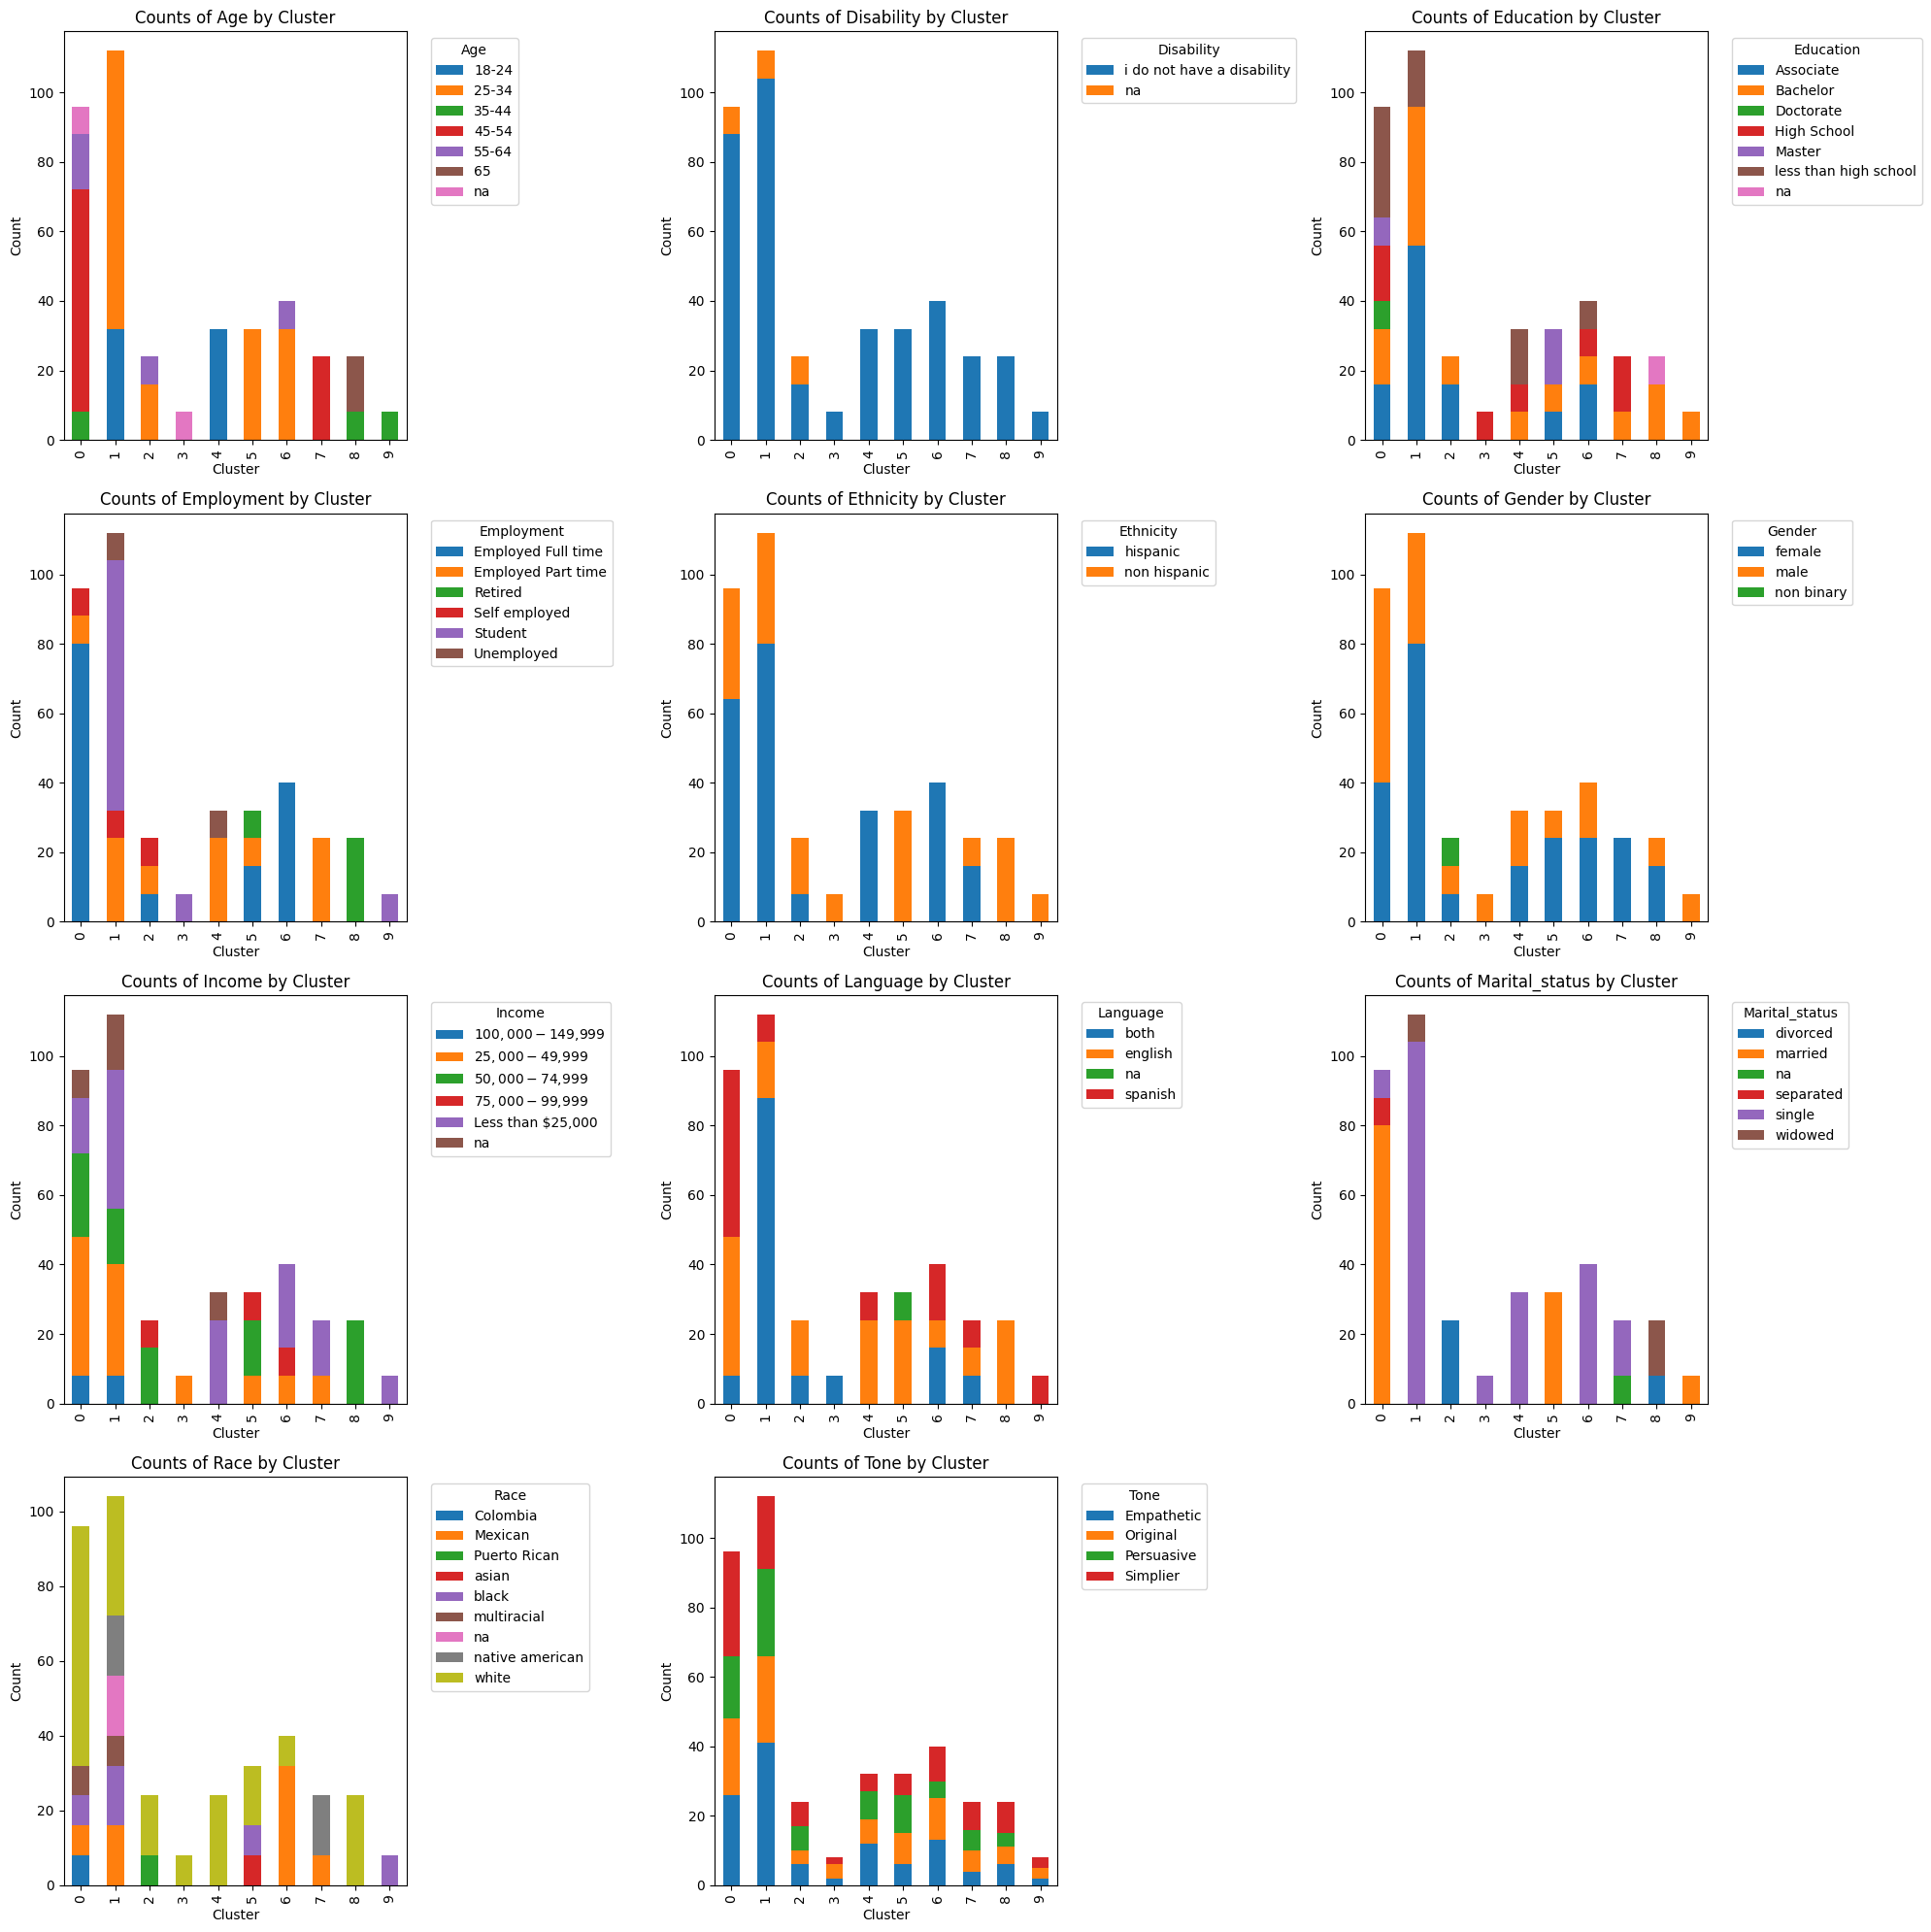

In [43]:
# Number of columns and rows for the subplots grid
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create a figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Generate stacked bar charts for each column
for idx, column in enumerate(columns_to_plot):
    # Aggregate data for the given column
    cluster_option_counts = data.groupby(['Cluster', column]).size().unstack(fill_value=0)
    
    # Plotting the stacked bar chart on the corresponding subplot
    ax = cluster_option_counts.plot(kind='bar', stacked=True, ax=axes[idx])
    
    # Add labels and title
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Count')
    ax.set_title(f'Counts of {column.capitalize()} by Cluster')
    ax.legend(title=column.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout for the subplot
    plt.tight_layout()

# Remove any unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Show all plots
plt.show()